In [1]:
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from eofs.xarray import Eof

import utils

wave: amplitude=1, period=15
wave: amplitude=1.5, period=25


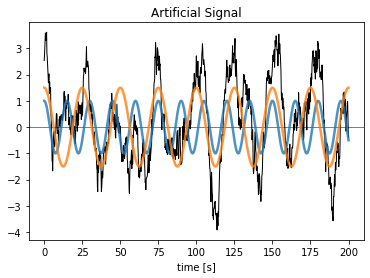

In [2]:
amp = (1,1.5)
period = (15,25)

signal_grid, signal = utils.create_signal(
    amplitude_and_period=[(amp[0], period[0]), (amp[1], period[1])],
    white_noise_amplitude=.1,
    red_noise_amplitude_and_r1=(1, 0.95),
)

In [27]:
n = len(signal)
dx = signal_grid[1]-signal_grid[0]
freqs = np.fft.rfftfreq (n, dx)
signal_fft = np.fft.rfft (signal)        
signal_power = np.abs(signal_fft)**2
T = 1/freqs

signal_max = np.zeros(len(signal_power))
signal_max[np.argmax(signal_power)] = np.max(signal_power)
print('First Maximum at Period: ', T[np.argmax(signal_power)])
signal_fft_max_rm = signal_power - signal_max
print('Second Maximum at Period: ', T[np.argmax(signal_fft_max_rm)])

First Maximum at Period:  25.025
Second Maximum at Period:  15.400000000000002


<ipython-input-27-70ddb670ef91>:6: RuntimeWarning: divide by zero encountered in true_divide
  T = 1/freqs


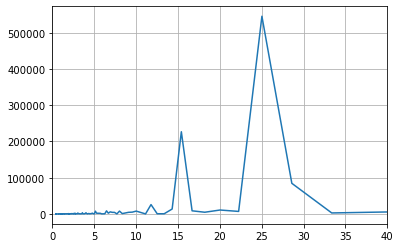

In [28]:
plt.plot(T,signal_power)
#plt.xscale('log')
plt.xlim(0,40)
plt.grid()
plt.show()

**Import QBO Data and compute Principal Components**

In [20]:
# load data
qbo_raw = utils.get_qbo()

# deseasonalize
qbo_anom = qbo_raw.groupby("time.dayofyear") - qbo_raw.groupby("time.dayofyear").mean()
qbo = qbo_anom.drop("dayofyear")

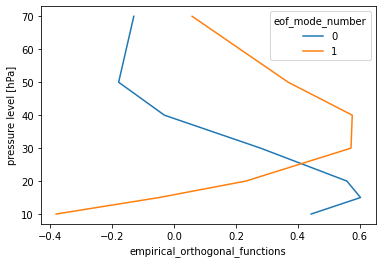

In [21]:
solver = Eof(qbo.T)

eofs = solver.eofs(neofs=2)

eofs.plot(hue="mode", y="p")
plt.show()

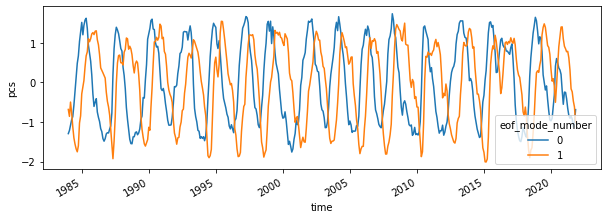

In [22]:
pcs = solver.pcs(npcs=2, pcscaling=1)

pcs.isel(mode=range(2)).plot(hue="mode", figsize=(10, 3))
plt.show()

Maximum at frequency: 28.4375


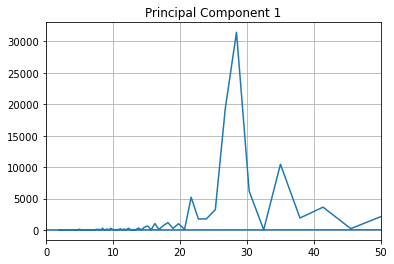

Maximum at frequency: 28.4375


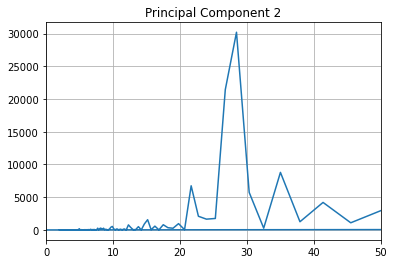

In [25]:
#Plot Power Spectra and Print Maxima of Principal Components 1 and 2

for i in np.arange(len(pcs.mode)):
    n_qbo = len(pcs.time)
    dx_qbo = 1
    freqs_qbo = np.fft.rfftfreq (n_qbo, dx_qbo)
    signal_fft_qbo = np.fft.rfft (pcs.sel(mode=i))        
    signal_power_qbo = np.abs(signal_fft_qbo)**2
    T_qbo = np.zeros(len(freqs_qbo))
    T_qbo[1:] = 1/freqs_qbo[1:]

    signal_max_qbo = np.zeros(len(signal_power_qbo))
    signal_max_qbo[np.argmax(signal_power_qbo)] = np.max(signal_power_qbo)
    print('Maximum at frequency: ' + str(T_qbo[np.argmax(signal_power_qbo)]))
    #signal_fft_max_rm_qbo = signal_power_qbo - signal_max_qbo
    #print('Second Maximum at frequency: ' + str(T_qbo[np.argmax(signal_fft_max_rm_qbo)]))

    plt.plot(T_qbo, signal_power_qbo)
    plt.title('Principal Component ' + str(i+1))
    ax = plt.gca()
    plt.xlim(0,50)
    plt.grid()
    #plt.xscale('log')
    plt.show()